[*********************100%%**********************]  1 of 1 completed


결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


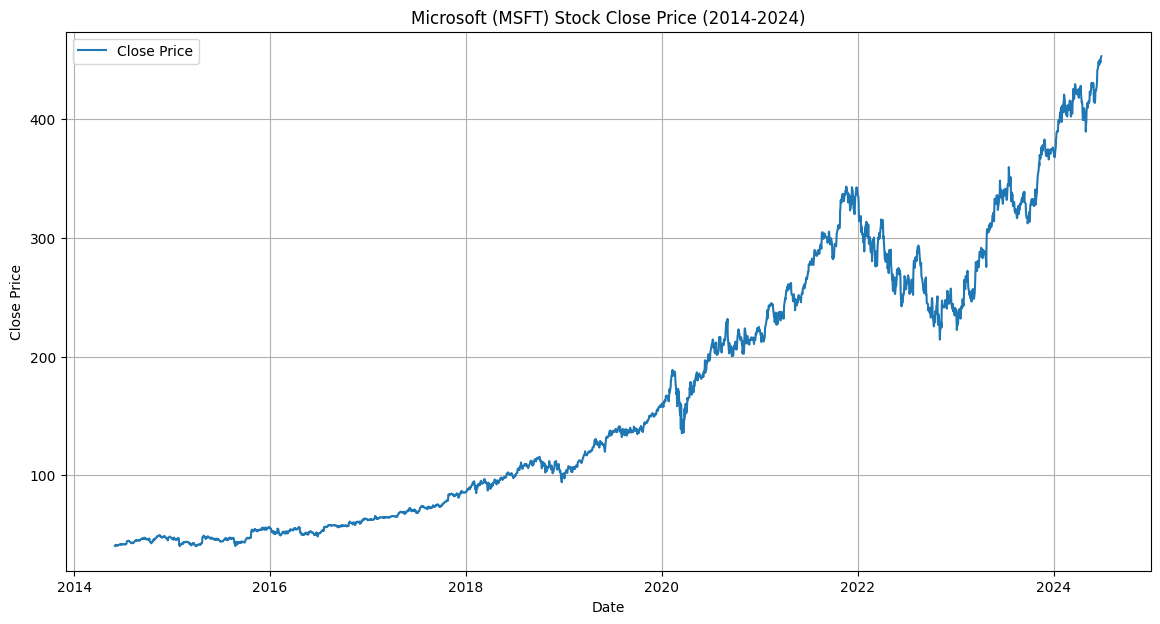

데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/MSFT주가데이터.csv


<ipython-input-1-92dcd1dbc7be>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Microsoft (MSFT) 주식 데이터 다운로드
ticker = "MSFT"
start_date = "2014-06-01"
end_date = "2024-06-28"

# 데이터 다운로드 (일봉)
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# 필요한 열만 선택 (고가, 저가, 종가, 거래량)
data = data[['High', 'Low', 'Close', 'Volume']]

# 결측치 (NaN 값) 체크
nan_values = data.isna().sum()
print("결측치 (NaN 값) 체크:\n", nan_values)

# 0값 체크
zero_values = (data == 0).sum()
print("0값 체크:\n", zero_values)

# 종가 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Microsoft (MSFT) Stock Close Price (2014-2024)')
plt.legend()
plt.grid(True)
plt.show()

# 종가의 변화량 계산
delta = data['Close'].diff()

# RSI 계산
period = 14
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=period, min_periods=1).mean()
avg_loss = loss.rolling(window=period, min_periods=1).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD 계산
short_period = 12
long_period = 26
signal_period = 9
ema_short = data['Close'].ewm(span=short_period, adjust=False).mean()
ema_long = data['Close'].ewm(span=long_period, adjust=False).mean()
data['MACD'] = ema_short - ema_long
data['Signal'] = data['MACD'].ewm(span=signal_period, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['Signal']

# 볼린저밴드 계산
band_period = 20
std_dev = 2
data['Middle_Band'] = data['Close'].rolling(window=band_period).mean()
data['Std_Dev'] = data['Close'].rolling(window=band_period).std()
data['Upper_Band'] = data['Middle_Band'] + (data['Std_Dev'] * std_dev)
data['Lower_Band'] = data['Middle_Band'] - (data['Std_Dev'] * std_dev)
data.drop(columns=['Std_Dev'], inplace=True)

# 사용하고자 하는 컬럼만 선택
data = data[['Close', 'Volume', 'RSI', 'MACD', 'Signal', 'MACD_Hist', 'Upper_Band', 'Middle_Band', 'Lower_Band']]

# 2014년 6월 28일 전의 데이터 삭제
data = data[data.index >= '2014-06-28']

# CSV 파일로 저장
file_path = '/content/drive/MyDrive/Colab Notebooks/data/MSFT주가데이터.csv'
data.to_csv(file_path)

# 저장된 데이터 확인
print(f"데이터가 성공적으로 저장되었습니다: {file_path}")


[*********************100%%**********************]  1 of 1 completed


결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


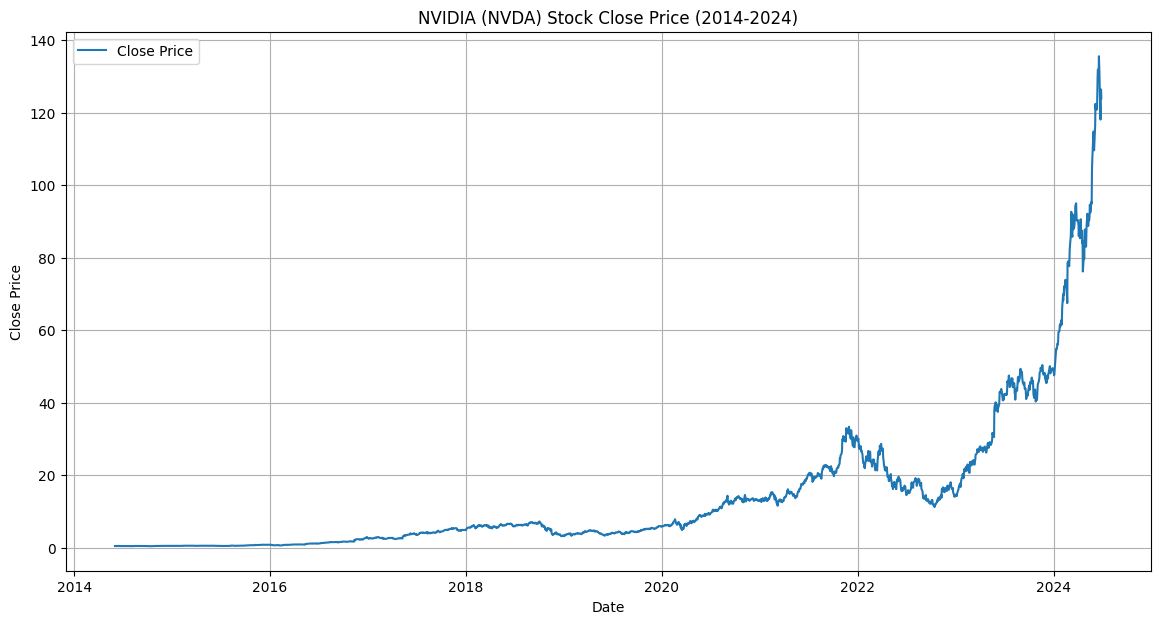

데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/NVDA주가데이터.csv


<ipython-input-2-ce9d7c18b8c7>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# NVIDIA (NVDA) 주식 데이터 다운로드
ticker = "NVDA"
start_date = "2014-06-01"
end_date = "2024-06-28"

# 데이터 다운로드 (일봉)
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# 필요한 열만 선택 (고가, 저가, 종가, 거래량)
data = data[['High', 'Low', 'Close', 'Volume']]

# 결측치 (NaN 값) 체크
nan_values = data.isna().sum()
print("결측치 (NaN 값) 체크:\n", nan_values)

# 0값 체크
zero_values = (data == 0).sum()
print("0값 체크:\n", zero_values)

# 종가 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NVIDIA (NVDA) Stock Close Price (2014-2024)')
plt.legend()
plt.grid(True)
plt.show()

# 종가의 변화량 계산
delta = data['Close'].diff()

# RSI 계산
period = 14
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=period, min_periods=1).mean()
avg_loss = loss.rolling(window=period, min_periods=1).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD 계산
short_period = 12
long_period = 26
signal_period = 9
ema_short = data['Close'].ewm(span=short_period, adjust=False).mean()
ema_long = data['Close'].ewm(span=long_period, adjust=False).mean()
data['MACD'] = ema_short - ema_long
data['Signal'] = data['MACD'].ewm(span=signal_period, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['Signal']

# 볼린저밴드 계산
band_period = 20
std_dev = 2
data['Middle_Band'] = data['Close'].rolling(window=band_period).mean()
data['Std_Dev'] = data['Close'].rolling(window=band_period).std()
data['Upper_Band'] = data['Middle_Band'] + (data['Std_Dev'] * std_dev)
data['Lower_Band'] = data['Middle_Band'] - (data['Std_Dev'] * std_dev)
data.drop(columns=['Std_Dev'], inplace=True)

# 사용하고자 하는 컬럼만 선택
data = data[['Close', 'Volume', 'RSI', 'MACD', 'Signal', 'MACD_Hist', 'Upper_Band', 'Middle_Band', 'Lower_Band']]

# 2014년 6월 28일 전의 데이터 삭제
data = data[data.index >= '2014-06-28']

# CSV 파일로 저장
file_path = '/content/drive/MyDrive/Colab Notebooks/data/NVDA주가데이터.csv'
data.to_csv(file_path)

# 저장된 데이터 확인
print(f"데이터가 성공적으로 저장되었습니다: {file_path}")


[*********************100%%**********************]  1 of 1 completed


결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


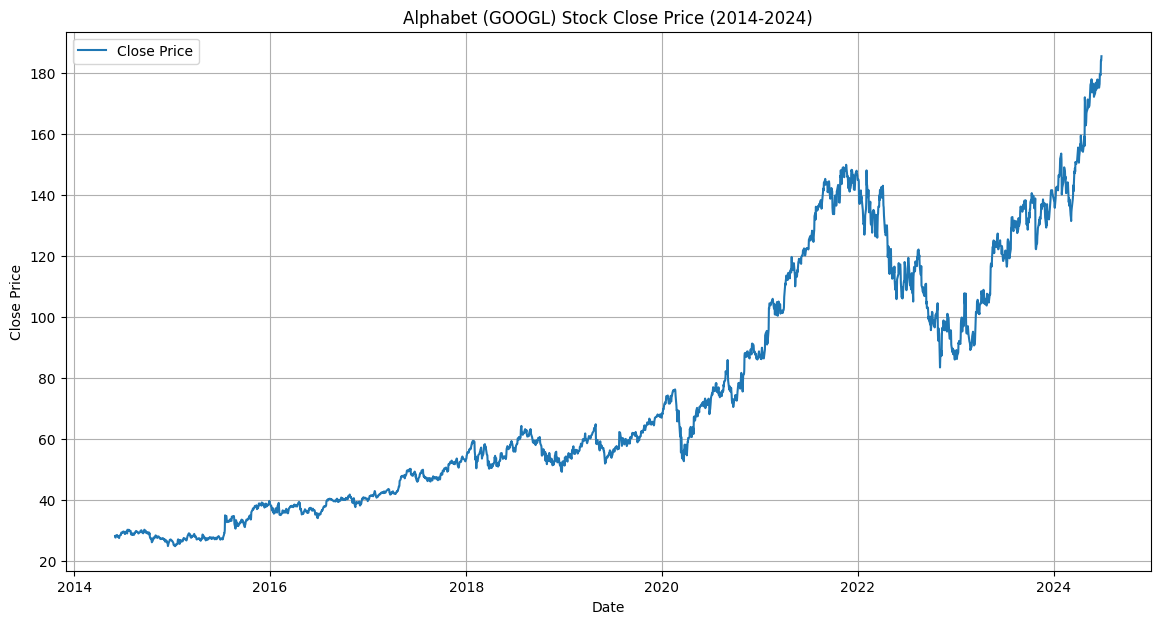

<ipython-input-5-551b8086fcf7>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/GOOGL주가데이터.csv


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Alphabet (GOOGL) 주식 데이터 다운로드
ticker = "GOOGL"
start_date = "2014-06-01"
end_date = "2024-06-28"

# 데이터 다운로드 (일봉)
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# 필요한 열만 선택 (고가, 저가, 종가, 거래량)
data = data[['High', 'Low', 'Close', 'Volume']]

# 결측치 (NaN 값) 체크
nan_values = data.isna().sum()
print("결측치 (NaN 값) 체크:\n", nan_values)

# 0값 체크
zero_values = (data == 0).sum()
print("0값 체크:\n", zero_values)

# 종가 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Alphabet (GOOGL) Stock Close Price (2014-2024)')
plt.legend()
plt.grid(True)
plt.show()

# 종가의 변화량 계산
delta = data['Close'].diff()

# RSI 계산
period = 14
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=period, min_periods=1).mean()
avg_loss = loss.rolling(window=period, min_periods=1).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD 계산
short_period = 12
long_period = 26
signal_period = 9
ema_short = data['Close'].ewm(span=short_period, adjust=False).mean()
ema_long = data['Close'].ewm(span=long_period, adjust=False).mean()
data['MACD'] = ema_short - ema_long
data['Signal'] = data['MACD'].ewm(span=signal_period, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['Signal']

# 볼린저밴드 계산
band_period = 20
std_dev = 2
data['Middle_Band'] = data['Close'].rolling(window=band_period).mean()
data['Std_Dev'] = data['Close'].rolling(window=band_period).std()
data['Upper_Band'] = data['Middle_Band'] + (data['Std_Dev'] * std_dev)
data['Lower_Band'] = data['Middle_Band'] - (data['Std_Dev'] * std_dev)
data.drop(columns=['Std_Dev'], inplace=True)

# 사용하고자 하는 컬럼만 선택
data = data[['Close', 'Volume', 'RSI', 'MACD', 'Signal', 'MACD_Hist', 'Upper_Band', 'Middle_Band', 'Lower_Band']]

# 2014년 6월 28일 전의 데이터 삭제
data = data[data.index >= '2014-06-28']

# CSV 파일로 저장
file_path = '/content/drive/MyDrive/Colab Notebooks/data/GOOGL주가데이터.csv'
data.to_csv(file_path)

# 저장된 데이터 확인
print(f"데이터가 성공적으로 저장되었습니다: {file_path}")


[*********************100%%**********************]  1 of 1 completed


JPM 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
JPM 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


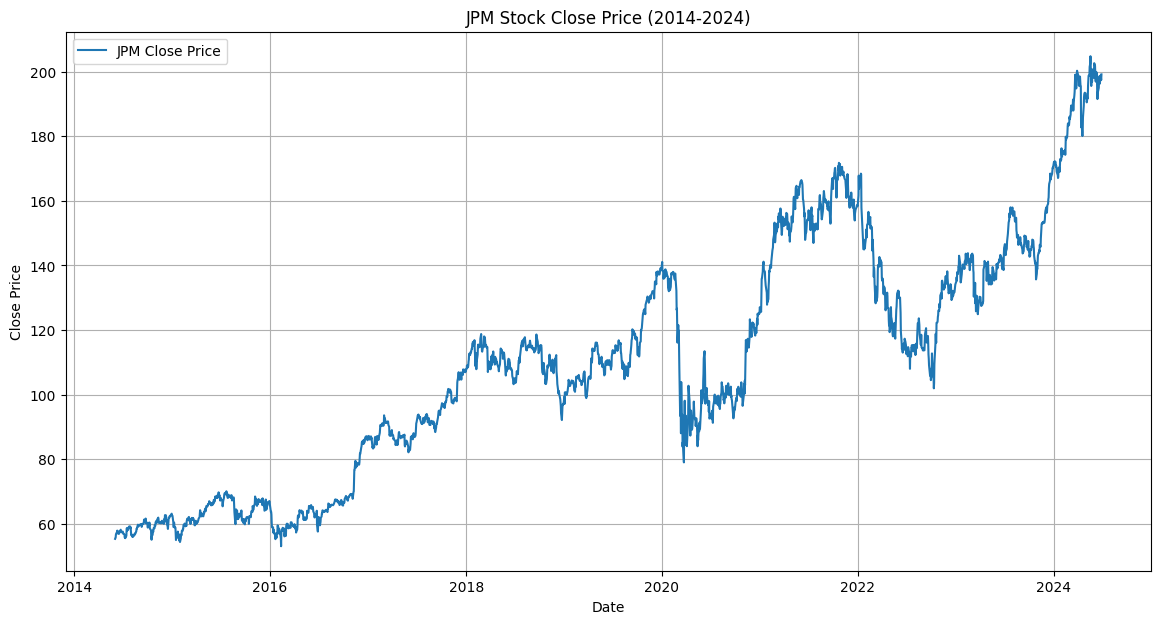

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/JPM주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


BAC 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
BAC 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


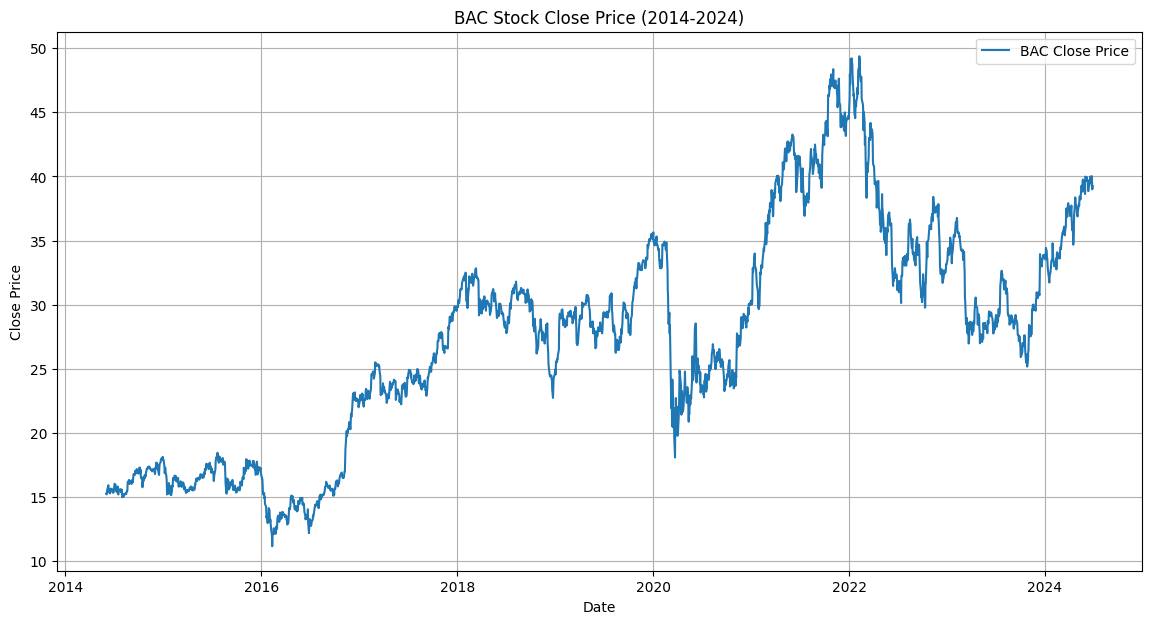

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/BAC주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


GS 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
GS 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


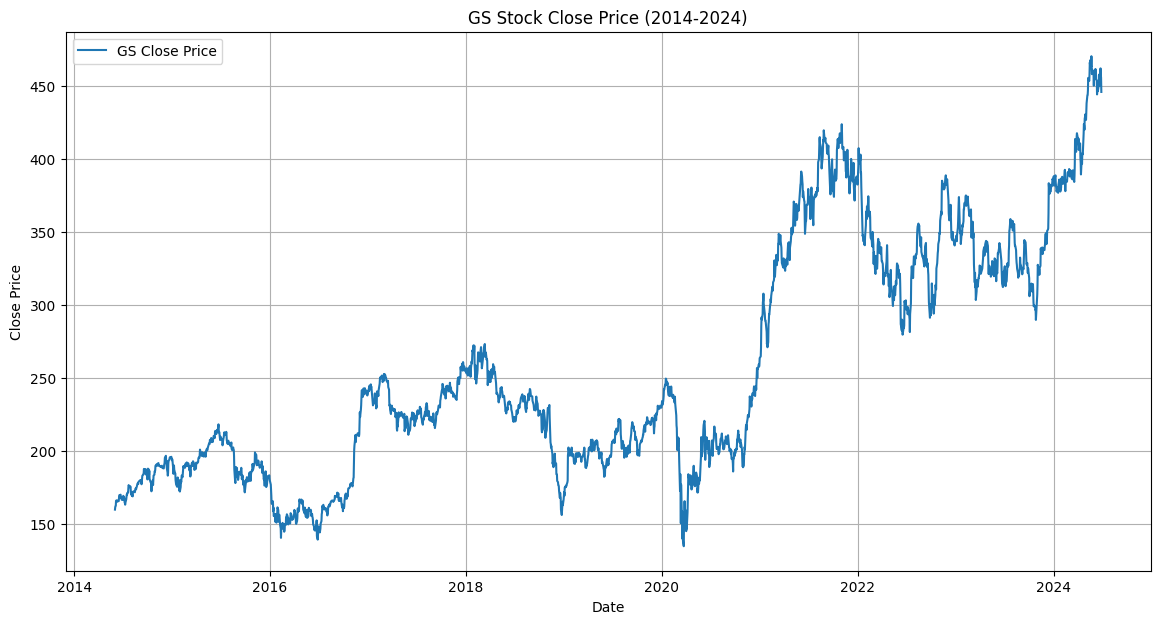

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/GS주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


WFC 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
WFC 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


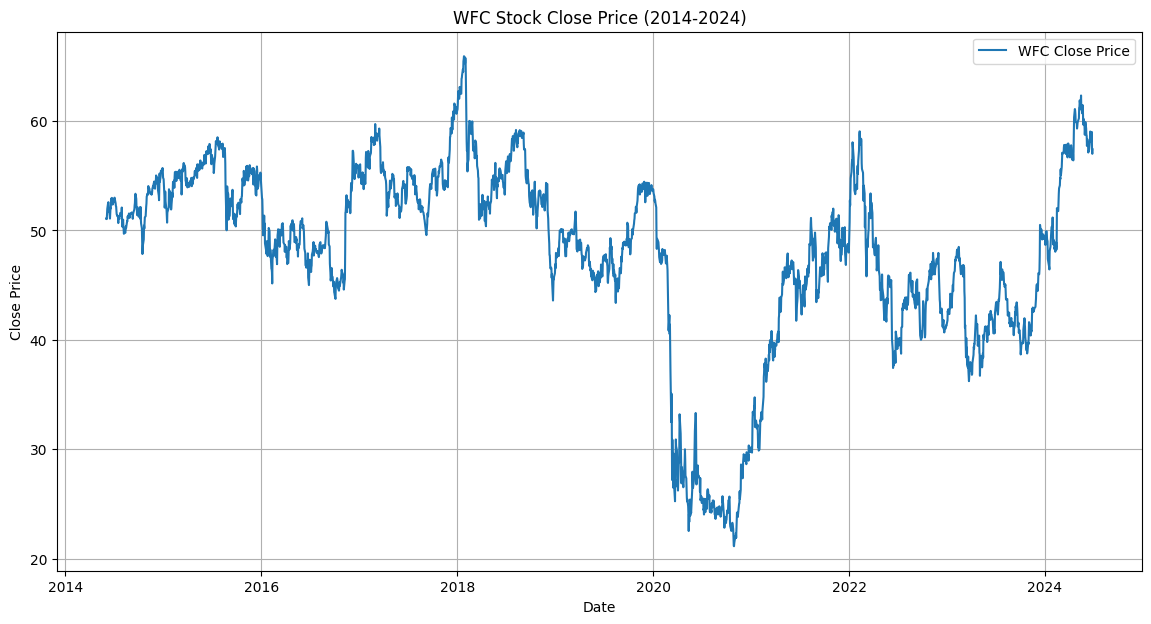

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/WFC주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


KO 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
KO 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


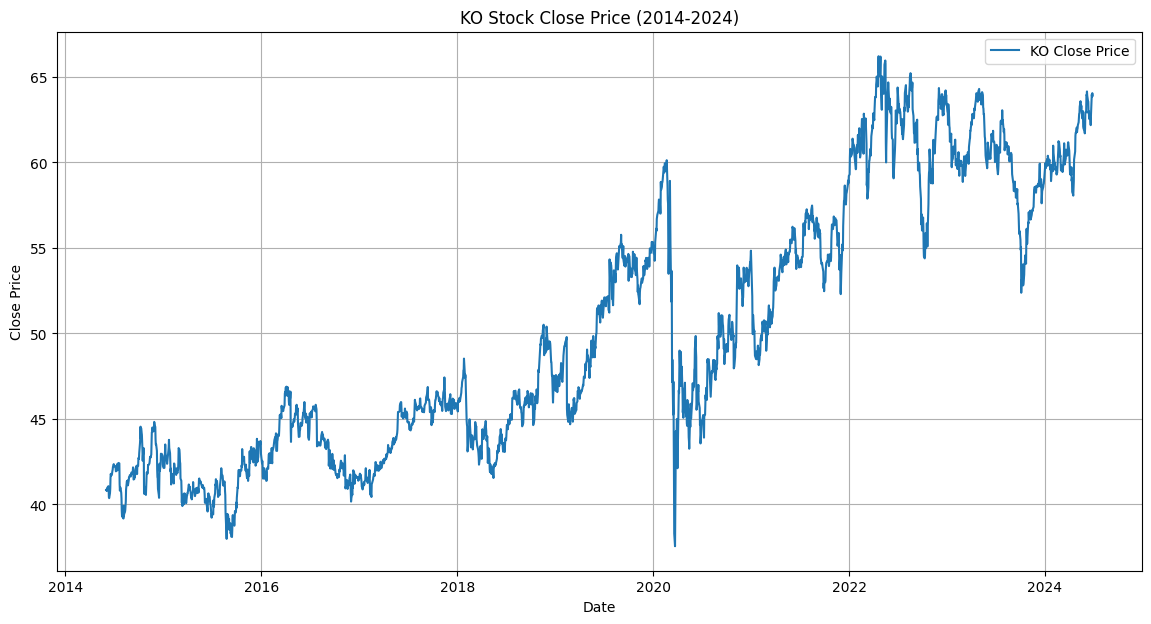

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/KO주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


PG 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
PG 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


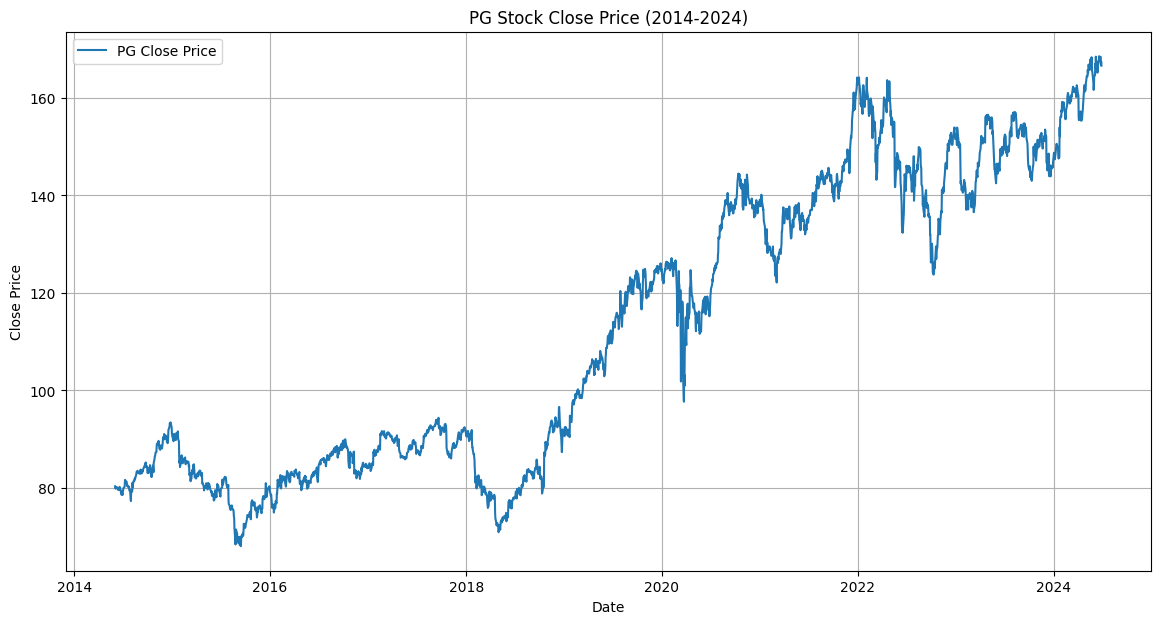

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/PG주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


MO 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
MO 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


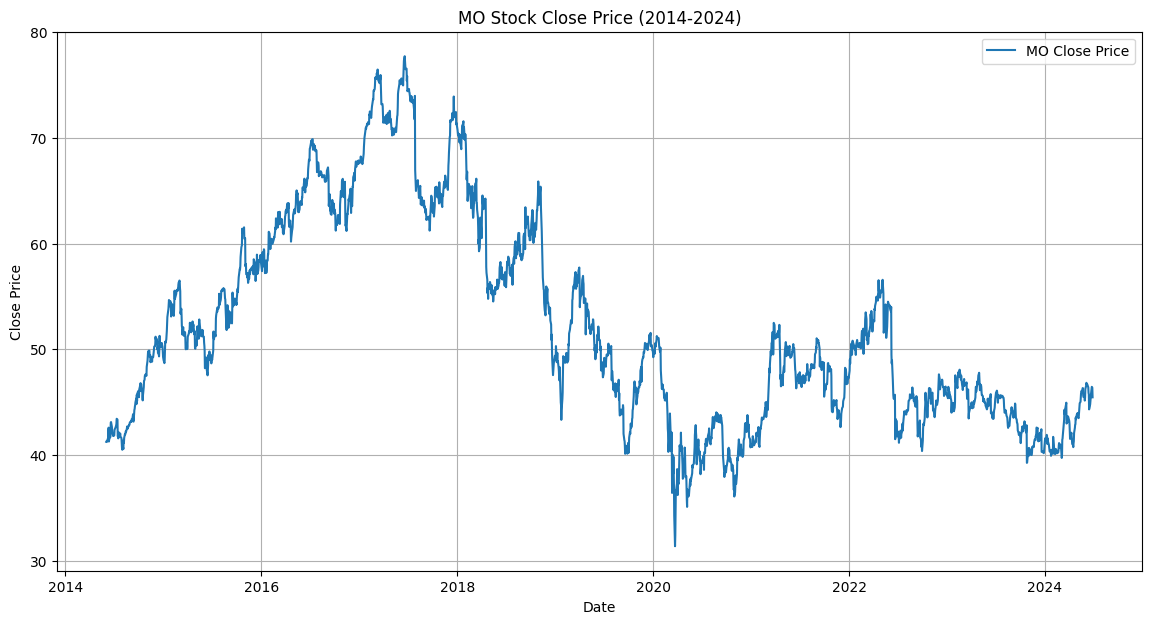

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/MO주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


WMT 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
WMT 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


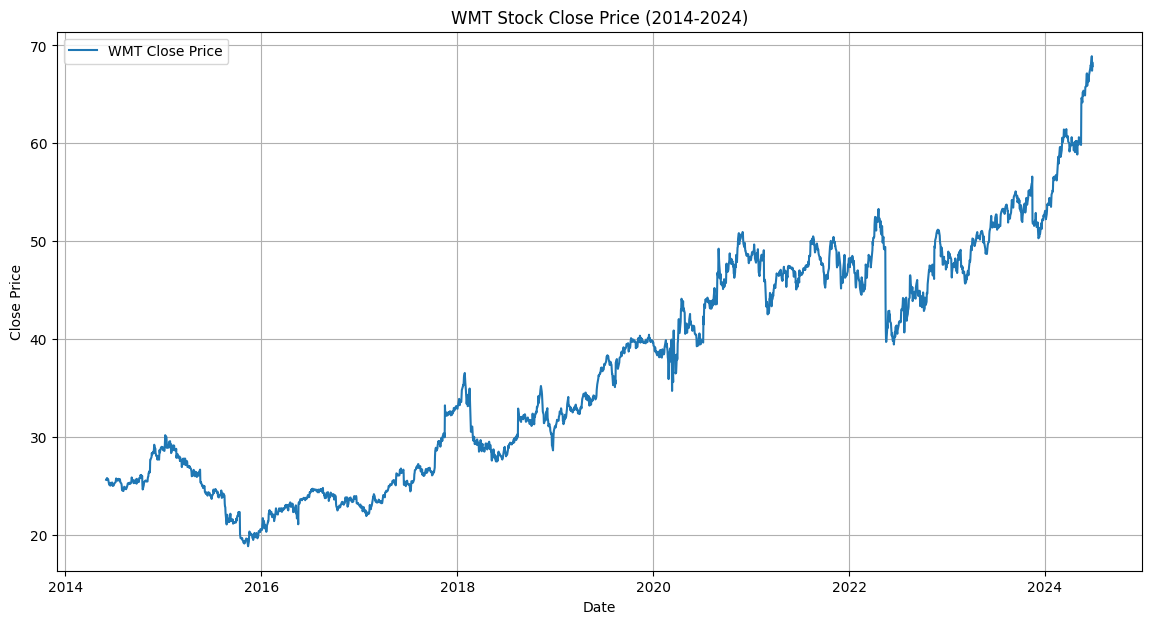

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/WMT주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


JNJ 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
JNJ 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


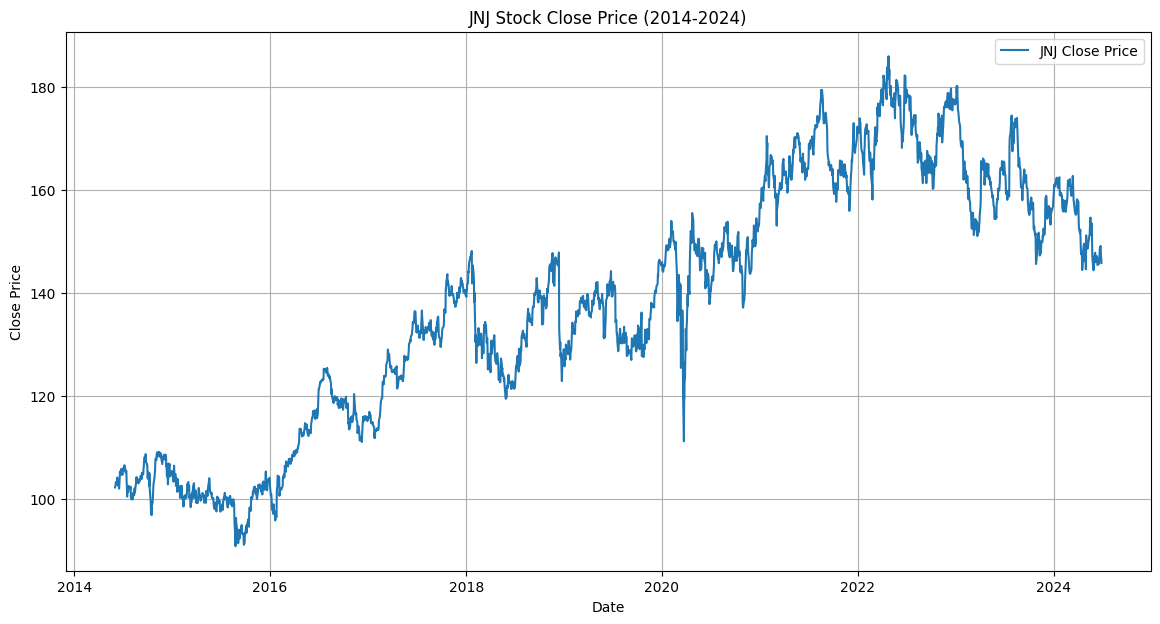

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/JNJ주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


PFE 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
PFE 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


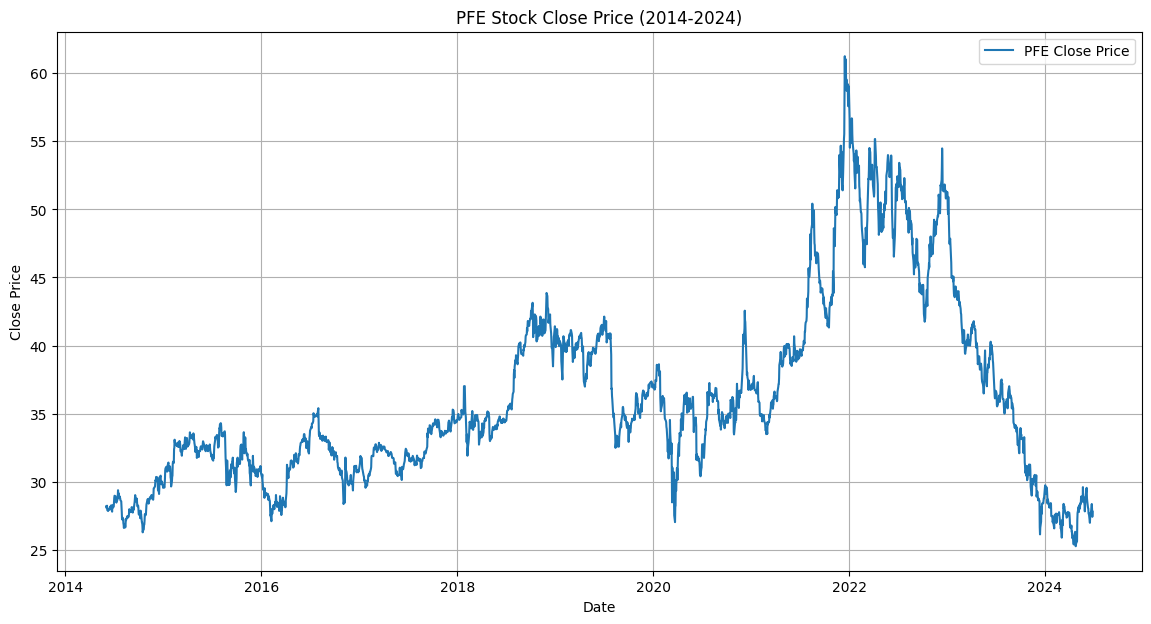

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/PFE주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


UNH 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
UNH 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


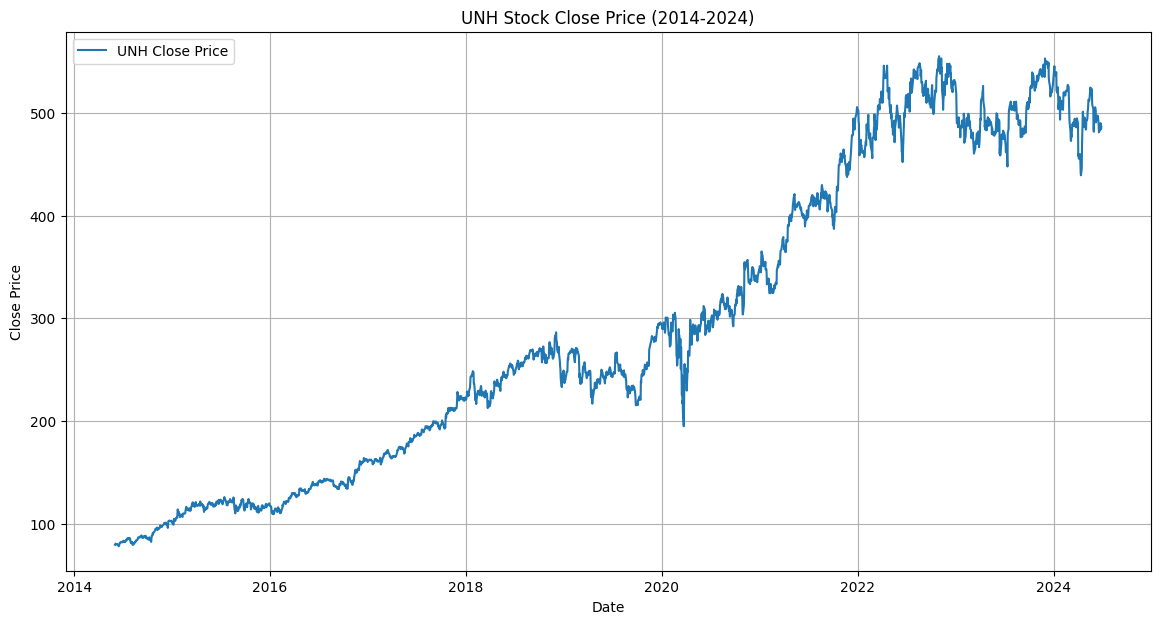

<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/UNH주가데이터.csv


[*********************100%%**********************]  1 of 1 completed


MRK 결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
MRK 0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


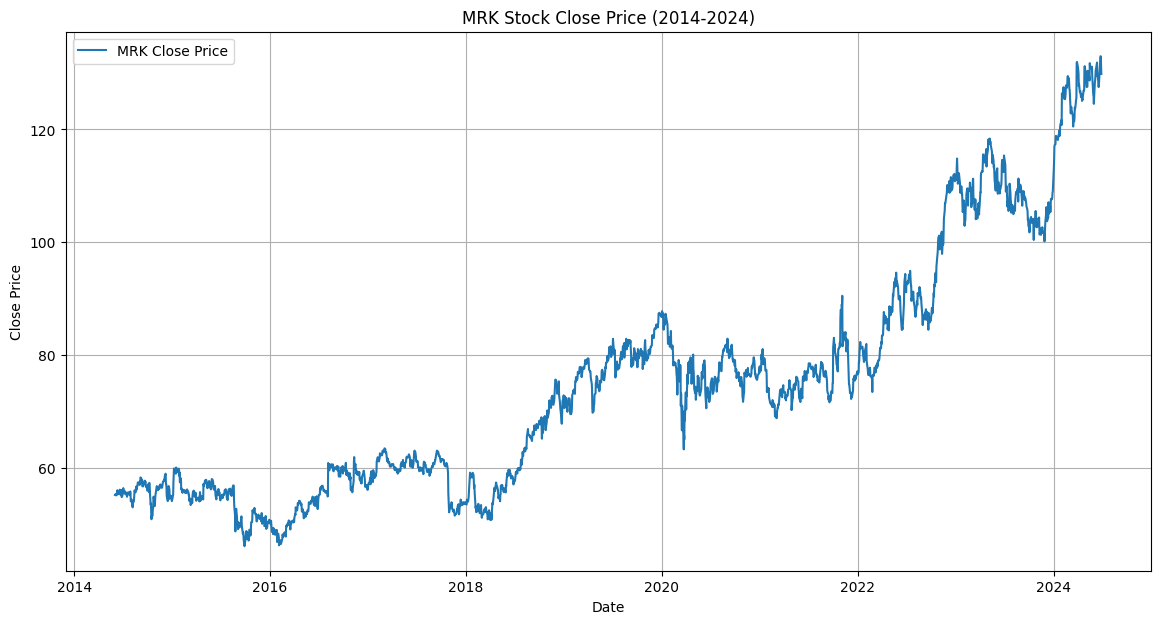

데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/MRK주가데이터.csv


<ipython-input-7-b9c8c9019aea>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 종목 리스트 (금융, 필수소비재, 헬스케어 섹터)
tickers = ["JPM", "BAC", "GS", "WFC", "KO", "PG", "MO", "WMT", "JNJ", "PFE", "UNH", "MRK"]
start_date = "2014-06-01"
end_date = "2024-06-28"

for ticker in tickers:
    # 주식 데이터 다운로드
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

    # 필요한 열만 선택 (고가, 저가, 종가, 거래량)
    data = data[['High', 'Low', 'Close', 'Volume']]

    # 결측치 (NaN 값) 체크
    nan_values = data.isna().sum()
    print(f"{ticker} 결측치 (NaN 값) 체크:\n", nan_values)

    # 0값 체크
    zero_values = (data == 0).sum()
    print(f"{ticker} 0값 체크:\n", zero_values)

    # 종가 데이터 시각화
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label=f'{ticker} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'{ticker} Stock Close Price (2014-2024)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 종가의 변화량 계산
    delta = data['Close'].diff()

    # RSI 계산
    period = 14
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # MACD 계산
    short_period = 12
    long_period = 26
    signal_period = 9
    ema_short = data['Close'].ewm(span=short_period, adjust=False).mean()
    ema_long = data['Close'].ewm(span=long_period, adjust=False).mean()
    data['MACD'] = ema_short - ema_long
    data['Signal'] = data['MACD'].ewm(span=signal_period, adjust=False).mean()
    data['MACD_Hist'] = data['MACD'] - data['Signal']

    # 볼린저밴드 계산
    band_period = 20
    std_dev = 2
    data['Middle_Band'] = data['Close'].rolling(window=band_period).mean()
    data['Std_Dev'] = data['Close'].rolling(window=band_period).std()
    data['Upper_Band'] = data['Middle_Band'] + (data['Std_Dev'] * std_dev)
    data['Lower_Band'] = data['Middle_Band'] - (data['Std_Dev'] * std_dev)
    data.drop(columns=['Std_Dev'], inplace=True)

    # 사용하고자 하는 컬럼만 선택
    data = data[['Close', 'Volume', 'RSI', 'MACD', 'Signal', 'MACD_Hist', 'Upper_Band', 'Middle_Band', 'Lower_Band']]

    # 2014년 6월 28일 전의 데이터 삭제
    data = data[data.index >= '2014-06-28']

    # CSV 파일로 저장
    file_path = f'/content/drive/MyDrive/Colab Notebooks/data/{ticker}주가데이터.csv'
    data.to_csv(file_path)

    # 저장된 데이터 확인
    print(f"데이터가 성공적으로 저장되었습니다: {file_path}")
